# New Pokémon across early generations

This notebook uses the [PokéAPI](https://pokeapi.co/docs/v2#info) to aggregate and plot species additions over the first 4 generations. 

Want to track more generations? Grab data from the [the generation endpoint](https://pokeapi.co/docs/v2#generations), save it as a json file and add it to the `data` directory

In [5]:
# Recommended: Uncomment these if this is your first time running this notebook, you can comment/skip them afterwards
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install pandas


In [111]:
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
import json 

generations = []

# Loop through all json files in the data and add to generations list
for filename in os.listdir('data'):
    with open('data/'+ filename, 'r', encoding='utf-8') as json_file:
        generations.append(json.loads(json_file.read()))

# Extract the pokemon_species and generation name
df = pd.json_normalize(generations, ['pokemon_species'], meta=['name', 'version_groups'], record_prefix='pokemon_')

# This line shows the first 50 pokémon added to the data frame 
# df.head(50)
generation_counts = df.groupby(['name']).count()

# Count how many species were introduced per generation
generation_counts['pokemon_name']

name
generation-i      151
generation-ii     100
generation-iii    135
generation-iv     107
Name: pokemon_name, dtype: int64

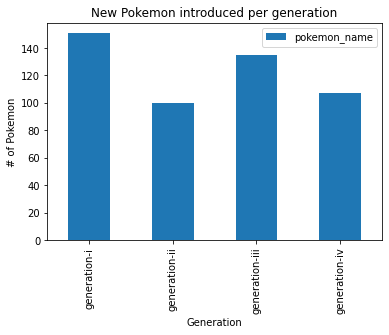

In [113]:
bar = generation_counts.plot.bar(y='pokemon_name', xlabel = 'Generation', ylabel = '# of Pokémon', title="New Pokémon introduced per generation")


# Results

The query and graph show that a large number of Pokémon were introduced in the first and third generations. Querying the rest of the keys in this data may answer why generation 3 is larger than 2 and 4. Give it a try, good luck!